<a href="https://colab.research.google.com/github/Soumi7/TFNotebooks/blob/master/DataPlay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df_train = pd.read_csv("drive/My Drive/final2.csv")

In [0]:
df_train.columns

Index(['Unnamed: 0', 'date', 'isholnum', 'sku', 'group', 'name', 'quantity',
       'unit_cogs', 'sunrise', 'sunset', 'HeatIndexC', 'cloudcover',
       'humidity', 'tempC', 'Avgtemp'],
      dtype='object')

In [0]:
df_train['quantity'].describe()

count    23180.000000
mean        15.967602
std         82.679277
min          0.030000
25%          2.000000
50%          4.000000
75%         11.000000
max       2735.000000
Name: quantity, dtype: float64

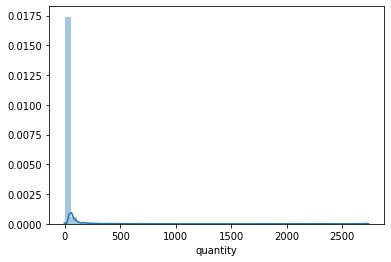

In [0]:
sns.distplot(df_train['quantity'])

Kurtosis is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution. In other words, kurtosis identifies whether the tails of a given distribution contain extreme values.

Skewness is a measure of anti symmetry

In [0]:
df_train['quantity'].skew()

23.420576244011702

In [0]:
df_train['quantity'].kurt()

672.0362160737765

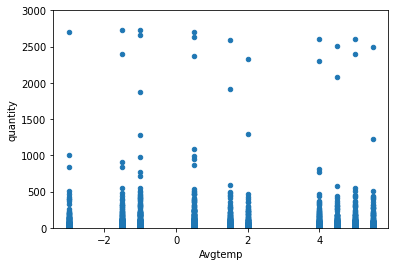

In [0]:
var='Avgtemp' # replace the diff variables here
data = pd.concat([df_train['quantity'],df_train[var]],axis=1)
data.plot.scatter(x=var,y='quantity',ylim=(0,3000)) #ylim(limits) sets the y-axis limits for the current axes or char

Examples of categorical variables are race, sex, age group, and educational level.

Correlation. Correlation is a statistical technique that can show whether and how strongly pairs of variables are related. For example, height and weight are related; taller people tend to be heavier than shorter people

In [0]:
corrmatrix= df_train.corr()
print(corrmatrix)

            Unnamed: 0  isholnum       sku  ...  humidity     tempC   Avgtemp
Unnamed: 0    1.000000 -0.299924  0.028434  ... -0.777058 -0.778239 -0.792904
isholnum     -0.299924  1.000000 -0.001159  ...  0.377513  0.493961  0.406016
sku           0.028434 -0.001159  1.000000  ... -0.023975 -0.016995 -0.018710
quantity      0.002393  0.003883 -0.035209  ... -0.006593 -0.003053 -0.004754
unit_cogs     0.008279 -0.006207  0.016694  ...  0.008191 -0.004402 -0.003041
HeatIndexC   -0.831120  0.459041 -0.019463  ...  0.706795  0.990233  0.991941
cloudcover   -0.745130  0.256512 -0.023873  ...  0.741880  0.841281  0.881697
humidity     -0.777058  0.377513 -0.023975  ...  1.000000  0.639841  0.671473
tempC        -0.778239  0.493961 -0.016995  ...  0.639841  1.000000  0.988872
Avgtemp      -0.792904  0.406016 -0.018710  ...  0.671473  0.988872  1.000000

[10 rows x 10 columns]


The line of 1.00s going from the top left to the bottom right is the main diagonal, which shows that each variable always perfectly correlates with itself. 

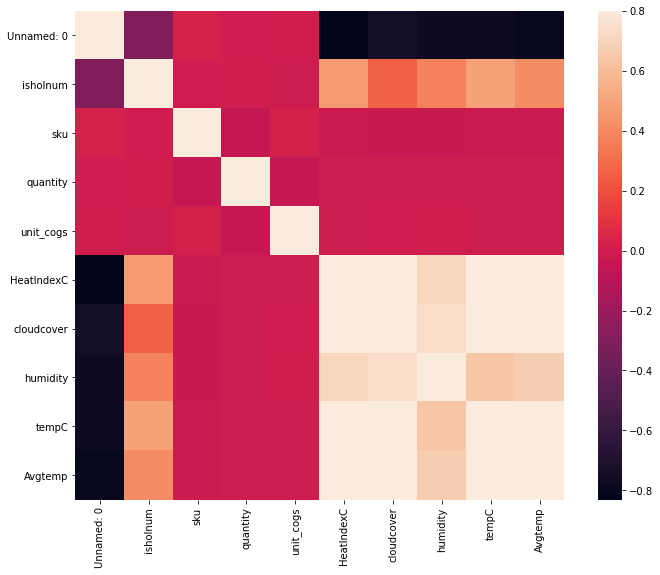

In [0]:
f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmatrix, vmax=.8, square=True) #values close to 0 mean almost 0 dependance, close to one is positive dependance and negative means inversely related

Therefore quantity does not have linear corelation.

# The other types of correlation are:

Positive, Negative or Zero Correlation:

Linear or Curvilinear Correlation:

Scatter Diagram Method:

Pearson's Product Moment Co-efficient of Correlation:

Spearman's Rank Correlation Coefficient:

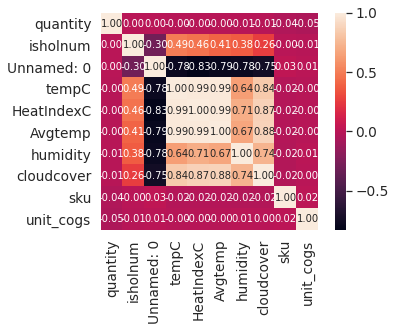

In [0]:
k=10
cols=corrmatrix.nlargest(k,'quantity')['quantity'].index
cm= np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values )
plt.show()

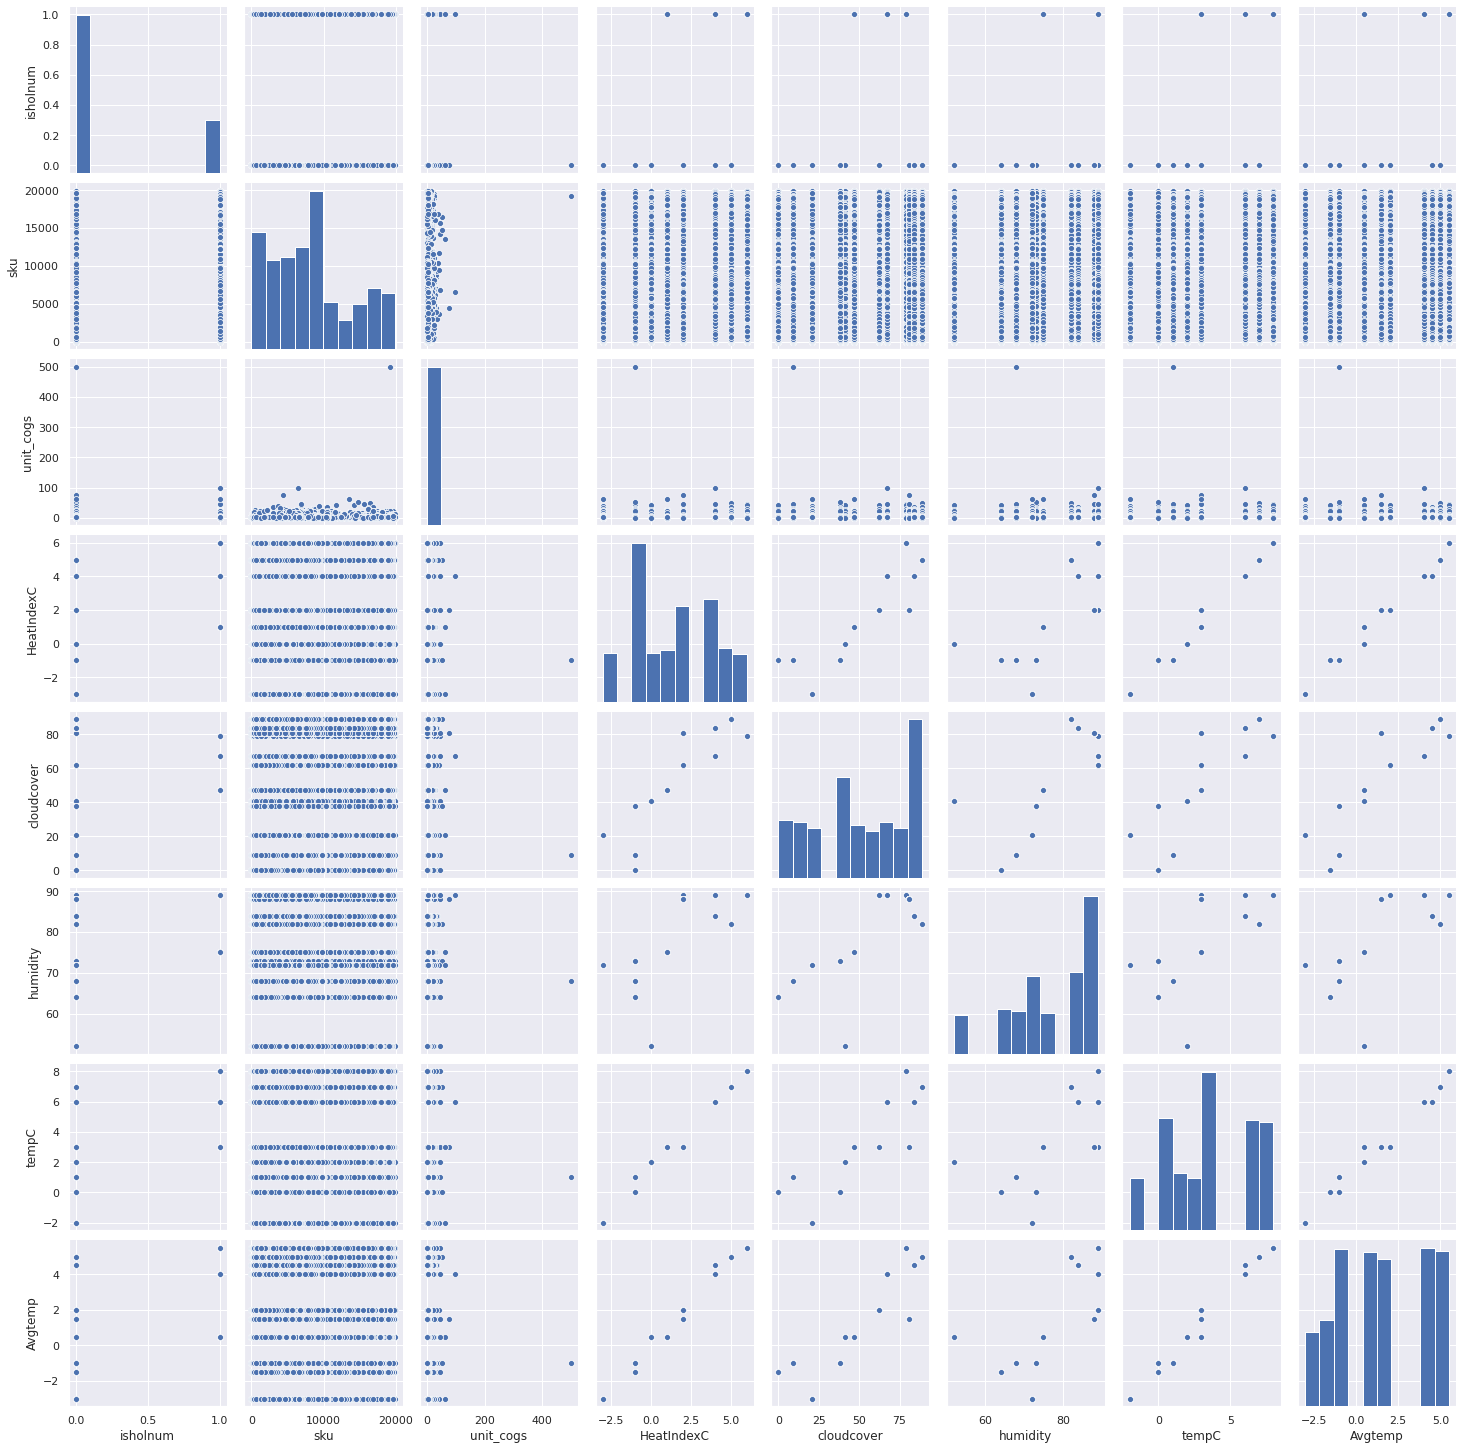

In [0]:
sns.set()
cols=['date', 'isholnum', 'sku', 'group', 'name', 'unit_cogs', 'sunrise', 'sunset', 'HeatIndexC', 'cloudcover','humidity', 'tempC', 'Avgtemp']
sns.pairplot(df_train[cols], size=2.5)
plt.show()

Checking missing values

In [0]:
data=df_train.isnull().sum()
print(data)

Unnamed: 0    0
date          0
isholnum      0
sku           0
group         0
name          0
quantity      0
unit_cogs     0
sunrise       0
sunset        0
HeatIndexC    0
cloudcover    0
humidity      0
tempC         0
Avgtemp       0
dtype: int64


To scale the data:

In [0]:
quantity_scaled = StandardScaler().fit_transform(df_train['quantity'][:,np.newaxis])
low_range = quantity_scaled[quantity_scaled[:,0].argsort()][:10]
high_range = quantity_scaled[quantity_scaled[:,0].argsort()][:10]
print("lower range of scaled data:")
print(low_range)
print("higher range of scaled data:")
print(high_range)

lower range of scaled data:
[[-0.19276833]
 [-0.19264737]
 [-0.19252642]
 [-0.19252642]
 [-0.19252642]
 [-0.19245385]
 [-0.19240547]
 [-0.19240547]
 [-0.19240547]
 [-0.19228452]]
higher range of scaled data:
[[-0.19276833]
 [-0.19264737]
 [-0.19252642]
 [-0.19252642]
 [-0.19252642]
 [-0.19245385]
 [-0.19240547]
 [-0.19240547]
 [-0.19240547]
 [-0.19228452]]


## Bivariate Analysis for outliers

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


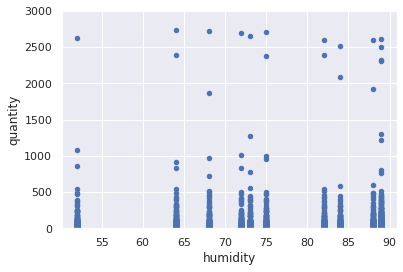

In [27]:
#bivariate analysis quantity/HeatIndexC
var = 'humidity'
data = pd.concat([df_train['quantity'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='quantity', ylim=(0,3000));

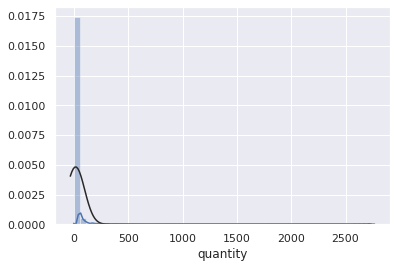

In [33]:
sns.distplot(df_train['quantity'],fit=norm)

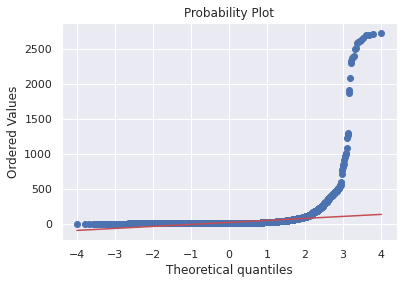

In [31]:
res=stats.probplot(df_train['quantity'],plot=plt)

#### Trying Data Transformations

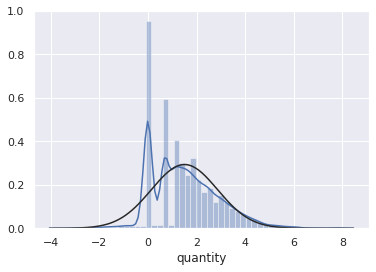

In [34]:
df_train['quantity']=np.log(df_train['quantity'])
sns.distplot(df_train['quantity'],fit=norm)

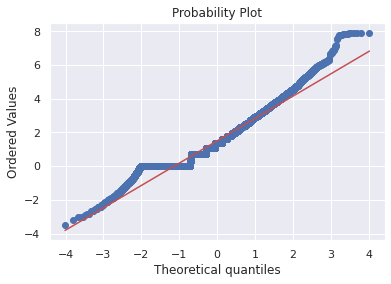

In [35]:
res=stats.probplot(df_train['quantity'],plot=plt)

Isn't this better?

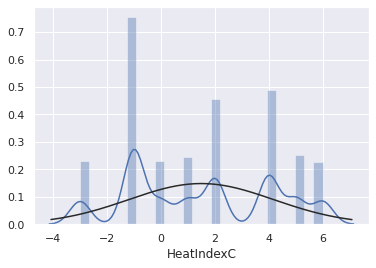

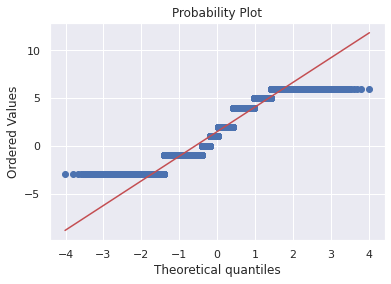

In [40]:
sns.distplot(df_train['HeatIndexC'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['HeatIndexC'], plot=plt)

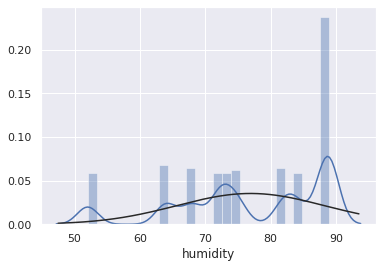

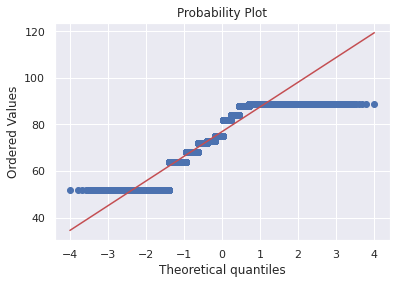

In [41]:
sns.distplot(df_train['humidity'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['humidity'], plot=plt)

Such weird plots! Again trying out putting log on the data

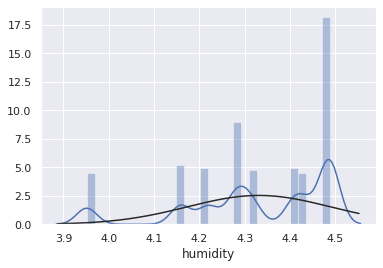

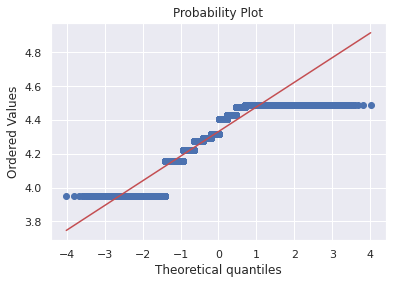

In [43]:
df_train['humidity']=np.log(df_train['humidity'])
sns.distplot(df_train['humidity'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['humidity'], plot=plt)

Didnt help, also same log was tried on HeatIndexC, apparently it has infinity values?

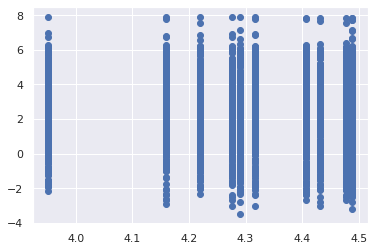

In [44]:
plt.scatter(df_train['humidity'], df_train['quantity']);

My God, what is this?

Didnt change any data except the quantity and humidity columns, made them log. The log function isnt working on HeatIndexC(why?)